# Summary
* I. The ten states with the highest number of firms make up about 54% of total US population, which makes for a good represenation of the whole population. California has the highest number of firms, while .... has the lowest number of start ups/firms.
* II. 9 of the top 10 states with the highest number of firms also had the highest sales/revenue. New Jersey replaced North Carolina.
* III. Average revenue of firm per state only had Texas and New Jesrey, which means either the very few companies make the most revenue for the states or that the relatively fewere startups in these states that make up the top 10 states with average revenue have been very successful as result of lack competition.
* IV. Some of the sector names in the study are quite vague and ambiquous, but the the sector with the most enterpreneuers is the scientific and technical services.
* V. Majority of the firms are owned by Caucasians, while the next unambiqguous distinct race type was Asian, making up About....of total firms
* VI. About ...% are male owned, while female owned are.. and equally female and male owned are...
* VII. The state, sector with the highest female enterpreneurs, male, mixed...
* VIII. The state with the highest number of black owned, asian owned, white owned

In [1]:
# import dependencies
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import csv

In [2]:
# create file path
path_1 = os.path.join("Resources", "enter_2012.csv")
df = pd.DataFrame(pd.read_csv(path_1))
df.head()


/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (1,5,7,9,11,12,14,18,20,22,26) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,GEO.id,GEO.id2,GEO.display-label,NAICS.id,NAICS.display-label,SEX.id,SEX.display-label,ETH_GROUP.id,ETH_GROUP.display-label,RACE_GROUP.id,...,FIRMNOPD,RCPNOPD,FIRMALL_S,RCPALL_S,FIRMPDEMP_S,RCPPDEMP_S,EMP_S,PAYANN_S,FIRMNOPD_S,RCPNOPD_S
0,Geographic identifier code,Id2,Geographic area name,2012 NAICS code,Meaning of 2012 NAICS code,Gender code,Meaning of Gender code,Ethnicity code,Meaning of Ethnicity code,Race code,...,Number of firms without paid employees,"Sales, receipts, or value of shipments of firm...",Relative standard error of number of firms wit...,"Relative standard error of sales, receipts, or...",Relative standard error of number of firms wit...,"Relative standard error of sales, receipts, or...",Relative standard error of number of paid empl...,Relative standard error of annual payroll (%),Relative standard error of number of firms wit...,"Relative standard error of sales, receipts, or..."
1,0400000US01,01,Alabama,00,Total for all sectors,001,All firms,001,All firms,00,...,306704,12689088,0.2,0.7,0.3,0.7,1.2,0.8,0.2,1.5
2,0400000US01,01,Alabama,00,Total for all sectors,001,All firms,001,All firms,30,...,223716,10610757,0.4,1.9,0.6,2.0,2.5,1.8,0.4,2.3
3,0400000US01,01,Alabama,00,Total for all sectors,001,All firms,001,All firms,40,...,71109,1131644,0.6,5.8,5.7,7.9,9.9,13.0,0.6,7.0
4,0400000US01,01,Alabama,00,Total for all sectors,001,All firms,001,All firms,50,...,3427,91896,7.7,44.1,16.7,49.6,14.2,18.0,8.0,8.4


In [3]:
#delete the first row in the dataframe 
df.columns = df.iloc[0]
df = df.reindex(df.index.drop(0)).reset_index(drop=True)
df.columns.name = None

In [8]:
#rename the columns and pick out data we need 
data = df.rename(columns = {"Geographic area name":"State","Meaning of 2012 NAICS code":"Sector", 
                        "Meaning of Gender code":"Gender_owned", "Meaning of Race code": "Race",
                         "Number of firms with or without paid employees":"Number of Firms",
                         "Sales, receipts, or value of shipments of firms with or without paid employees ($1,000)":"Total Firm Sales",
                         "Number of firms with paid employees":"Paid Emp Firms", "Sales, receipts, or value of shipments of firms with paid employees ($1,000)":"Paid Emp Sales",
                         "Annual payroll ($1,000)":"Annual Payroll", "Number of firms without paid employees":"Unpaid Emp Firms",
                         "Sales, receipts, or value of shipments of firms without paid employees ($1,000)": "Unpaid Emp Sales"
                        })
#list the columns we need for analysis 
cols = [2,4,6,10,12,13,14,15,17,18,19]
new_data = data[data.columns[cols]]
new_data.head(10)

,State,Sector,Gender_owned,Race,Number of Firms,Total Firm Sales,Paid Emp Firms,Paid Emp Sales,Annual Payroll,Unpaid Emp Firms,Unpaid Emp Sales
0,Alabama,Total for all sectors,All firms,All firms,374153,410217329,67449,397528241,57623419,306704,12689088
1,Alabama,Total for all sectors,All firms,White,279625,150946701,55909,140335944,25480546,223716,10610757
2,Alabama,Total for all sectors,All firms,Black or African American,73015,3087663,1907,1956020,436107,71109,1131644
3,Alabama,Total for all sectors,All firms,American Indian and Alaska Native,3895,1291808,468,1199912,169299,3427,91896
4,Alabama,Total for all sectors,All firms,Asian,9353,4617052,3431,4305282,769114,5922,311771
5,Alabama,Total for all sectors,All firms,Asian Indian,2677,1977640,1733,1923420,308793,944,54221
6,Alabama,Total for all sectors,All firms,Chinese,1340,447485,616,411299,131137,723,36187
7,Alabama,Total for all sectors,All firms,Filipino,455,106963,126,99064,38124,329,7899
8,Alabama,Total for all sectors,All firms,Japanese,243,53048,23,48561,7402,219,4487
9,Alabama,Total for all sectors,All firms,Korean,1026,1361684,390,1322233,210297,635,39450


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


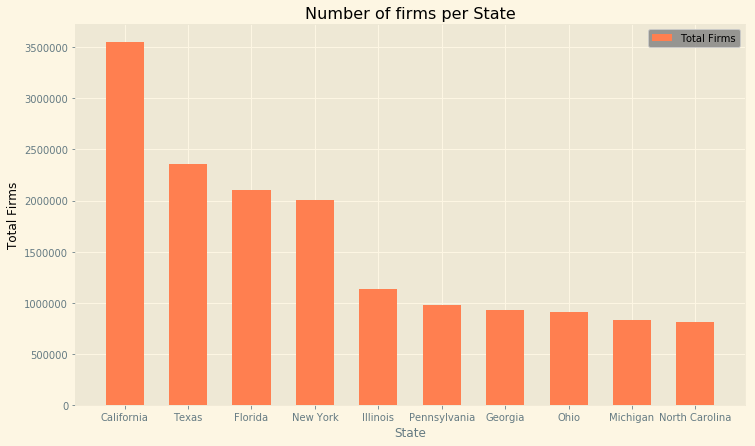

In [7]:
# make all values in the Number of firms Column integers
new_data['Number of Firms'] = new_data['Number of Firms'].astype(float)
#groupby state and maximum number of firms to extract total firms in each state
state_firms = new_data.groupby('State').agg({'Number of Firms':'max'})
#sort values in ascending order to get the 10 highest states
state_firms = state_firms.sort_values("Number of Firms", ascending=False)
#select the top 10 states 
state_firms = state_firms.head(10)
# reset index of the data frame
state_firms.reset_index(inplace=True)
# add all values to a list to plot bar chart
state_firms_x = state_firms["State"].tolist()
state_firms_y = state_firms["Number of Firms"].tolist()
#plot the bar chart for the 10 cities
xpos = np.arange(len(state_firms_x))
plt.xticks(xpos, state_firms_x)
plt.bar(state_firms_x, state_firms_y, width=0.6,
        label='Total Firms', facecolor='coral', align="center")
legend = plt.legend()
plt.rcParams['figure.figsize']= (12,7)

plt.style.use('Solarize_Light2')
legend.get_frame().set_facecolor('grey')

plt.title('Number of firms per State', color='black')
plt.ylabel('Total Firms', color='black')
plt.xlabel("State")
plt.savefig("Output/Revenue_state2012.png")

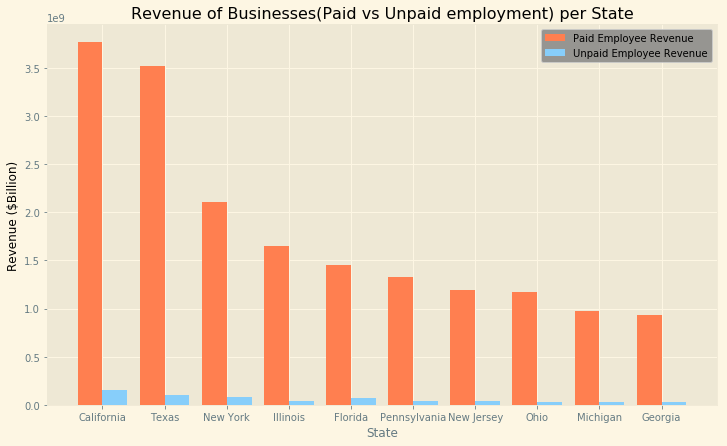

In [24]:
#change all values in the dataframe with "S" to 0
my_new_data = new_data.replace({'S': 0})
## make all values in the Paid Emp Sales and Unpaid Emp Firms Column integers
my_new_data['Paid Emp Sales'] = my_new_data['Paid Emp Sales'].astype(float)
my_new_data['Unpaid Emp Sales'] = my_new_data['Unpaid Emp Sales'].astype(float)
#groupby state and maximum number of Paid and Unpaid Employee Sales in each state
firm_sales = my_new_data.groupby('State').agg({'Paid Emp Sales':'max','Unpaid Emp Sales':'max'})

#sort values in ascending order to get the 10 highest states
firm_sales = firm_sales.sort_values("Paid Emp Sales", ascending=False)
#select the top 10 states
firm_sales = firm_sales.head(10)
# reset index of the data frame
firm_sales.reset_index(inplace=True)

#plot the bar chart
xpos = np.arange(len(firm_sales['State']))
plt.xticks(xpos+0.2, firm_sales['State'])


plt.bar(xpos, firm_sales['Paid Emp Sales'], width=0.4,
        label='Paid Employee Revenue', facecolor='coral', align='center')
plt.bar(xpos+0.4, firm_sales['Unpaid Emp Sales'], width=0.4,
        label='Unpaid Employee Revenue', facecolor='lightskyblue', align='center')

plt.title('Revenue of Businesses(Paid vs Unpaid employment) per State', color='black')
plt.ylabel('Revenue ($Billion)', color='black')

legend = plt.legend()
plt.rcParams['figure.figsize']= (12,7)
plt.style.use('Solarize_Light2')
legend.get_frame().set_facecolor('grey')
plt.xlabel("State")

plt.savefig("Output/revenue_per_employment2012.png")

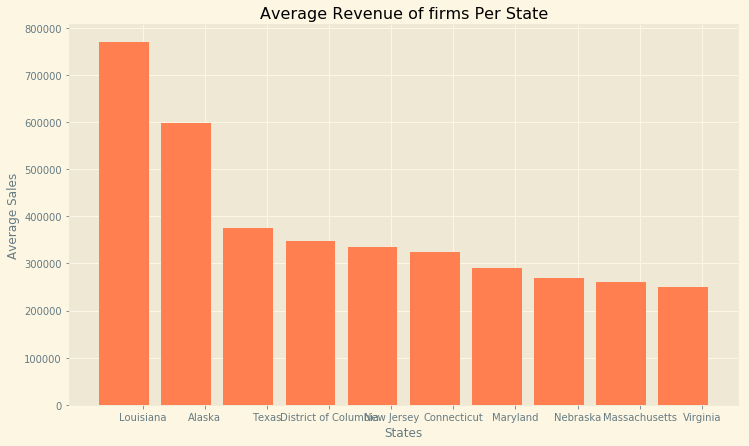

In [29]:
#create new column in master sheet with Avergage sales per firm
my_new_data['Total Firm Sales'] = my_new_data['Total Firm Sales'].astype(float)
my_new_data['Number of Firms'] = my_new_data['Number of Firms'].astype(float)
my_new_data["Average Sales"] = my_new_data["Total Firm Sales"] / my_new_data["Number of Firms"]
#groupby state and maximum Average to extract total firms in each state
average = my_new_data.groupby('State').agg({'Average Sales':'max'})
#sort values in ascending order to get the 10 highest states
average = average.sort_values("Average Sales", ascending=False)
#select the top 10 states 
average = average.head(10)
# reset index of the data frame
average.reset_index(inplace=True)
# add all values to a list to plot bar chart
average_x = average["State"].tolist()
average_y = average["Average Sales"].tolist()
#plot the bar chart for the 10 cities
xpos = np.arange(len(average_x))
plt.xticks(xpos+0.3, average_x)
plt.bar(average_x, average_y, color="coral", align="center")

plt.title("Average Revenue of firms Per State")
plt.xlabel("States")
plt.ylabel("Average Sales")
plt.legend
plt.savefig("Output/average_rev_state2012.png")

In [31]:
# Drop total firms for each sector in order to retrieve values for individual sectors
drop = new_data[new_data.Sector != "Total for all sectors"]
drop.head()

,State,Sector,Gender_owned,Race,Number of Firms,Total Firm Sales,Paid Emp Firms,Paid Emp Sales,Annual Payroll,Unpaid Emp Firms,Unpaid Emp Sales
136,Alabama,"Agriculture, forestry, fishing and hunting(606)",All firms,All firms,5199.0,1310197,788,1087312,220111,4411,222885
137,Alabama,"Agriculture, forestry, fishing and hunting(606)",All firms,White,4557.0,1121853,706,924452,187668,3852,197400
138,Alabama,"Agriculture, forestry, fishing and hunting(606)",All firms,Black or African American,318.0,20843,30,S,S,288,11438
139,Alabama,"Agriculture, forestry, fishing and hunting(606)",All firms,American Indian and Alaska Native,80.0,5749,2,S,S,78,4997
140,Alabama,"Agriculture, forestry, fishing and hunting(606)",All firms,Asian,138.0,8930,0,0,0,138,8930


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


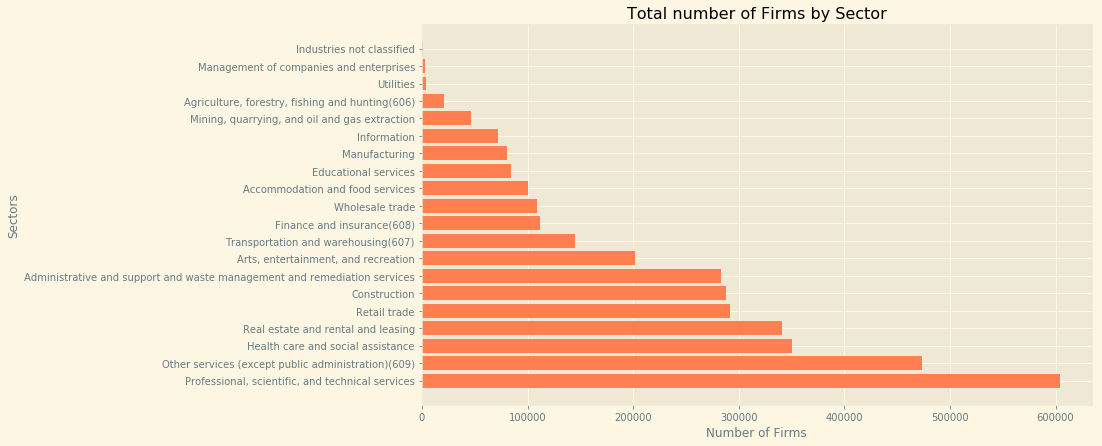

In [34]:
# Total number of firms per industry
drop["Number of Firms"] = drop["Number of Firms"].astype(float)
# groupby sector and maximum number of firms to retrtieve the maximum number of firms in each sector
sector_groupby = drop.groupby("Sector").agg({"Number of Firms": "max"})
sector_groupby = sector_groupby.sort_values("Number of Firms", ascending=False)
# reset index of the data frame
sector_groupby.reset_index(inplace=True)
# add values to a list 
sectors = sector_groupby["Sector"].tolist()
firms = sector_groupby["Number of Firms"].tolist()
# plot bar chart
plt.barh(sectors, firms, color="coral" ,align="center")
#plot labels, title and save image
plt.title("Total number of Firms by Sector")
plt.ylabel("Sectors")
plt.xlabel("Number of Firms")
plt.savefig("Output/Sectors&Firms2012.png")

In [35]:
# Drop total firms for each race in order to retrieve values for individual races
drop2 = new_data[(new_data.Race != "All firms") & (new_data.Race !="All firms classifiable by gender, ethnicity, race, and veteran status")]
drop2.head()

,State,Sector,Gender_owned,Race,Number of Firms,Total Firm Sales,Paid Emp Firms,Paid Emp Sales,Annual Payroll,Unpaid Emp Firms,Unpaid Emp Sales
1,Alabama,Total for all sectors,All firms,White,279625.0,150946701,55909,140335944,25480546,223716,10610757
2,Alabama,Total for all sectors,All firms,Black or African American,73015.0,3087663,1907,1956020,436107,71109,1131644
3,Alabama,Total for all sectors,All firms,American Indian and Alaska Native,3895.0,1291808,468,1199912,169299,3427,91896
4,Alabama,Total for all sectors,All firms,Asian,9353.0,4617052,3431,4305282,769114,5922,311771
5,Alabama,Total for all sectors,All firms,Asian Indian,2677.0,1977640,1733,1923420,308793,944,54221


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


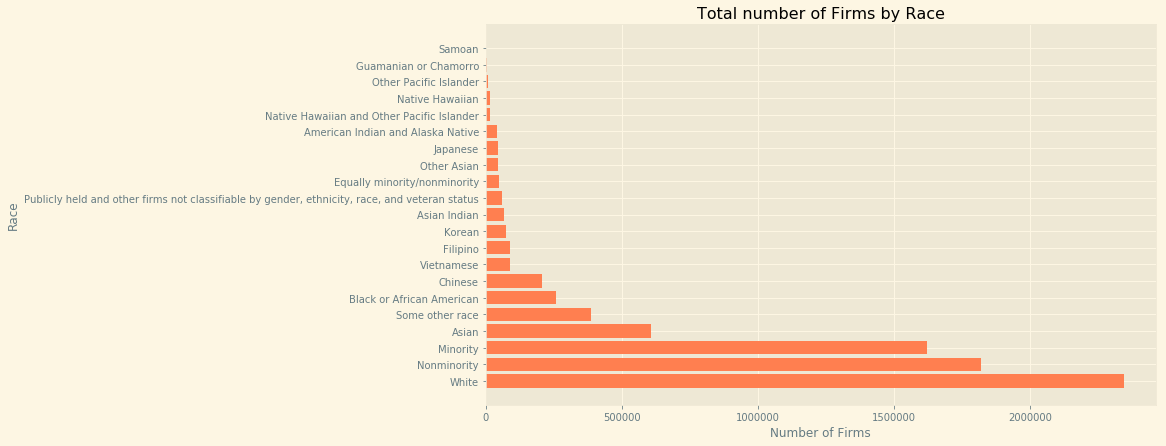

In [37]:
# Total number of firms per industry
drop2["Number of Firms"] = drop2["Number of Firms"].astype(float)
# groupby race and maximum number of firms to retrtieve the maximum number of firms in each sector
race_groupby = drop2.groupby("Race").agg({"Number of Firms": "max"})
race_groupby = race_groupby.sort_values("Number of Firms", ascending=False)
# reset index of the data frame
race_groupby.reset_index(inplace=True)
# add all values to a list
races = race_groupby["Race"].tolist()
firms2 = race_groupby["Number of Firms"].tolist()
# plot bar chart
plt.barh(races, firms2, color="coral")
# plot labels, title and save image
plt.title("Total number of Firms by Race")
plt.ylabel("Race")
plt.xlabel("Number of Firms")
plt.savefig("Output/Race&Firms2012.png")

In [38]:
# Drop redundant rows in order to retrieve values for individual gender
drop3 = new_data[~(new_data.Gender_owned.isin(["All firms", "Publicly held and other firms not classifiable by gender, ethnicity, race, and veteran status", "All firms classifiable by gender, ethnicity, race, and veteran status"]))]
drop3.head()

,State,Sector,Gender_owned,Race,Number of Firms,Total Firm Sales,Paid Emp Firms,Paid Emp Sales,Annual Payroll,Unpaid Emp Firms,Unpaid Emp Sales
50,Alabama,Total for all sectors,Female-owned,All firms,137630.0,17286337,11780,14778190,3315168,125850,2508147
51,Alabama,Total for all sectors,Female-owned,White,87445.0,15325057,10157,13477271,3031612,77288,1847786
52,Alabama,Total for all sectors,Female-owned,Black or African American,44914.0,796273,577,295648,101177,44337,500626
53,Alabama,Total for all sectors,Female-owned,American Indian and Alaska Native,2135.0,290908,199,261029,54520,1936,29879
54,Alabama,Total for all sectors,Female-owned,Asian,3816.0,911301,831,790902,144174,2986,120399


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


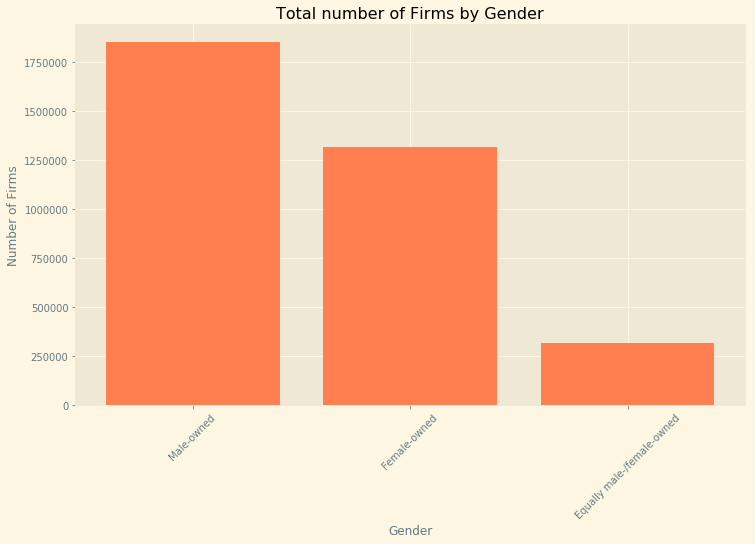

In [40]:
# Total number of firms per gender
drop3["Number of Firms"] = drop3["Number of Firms"].astype(float)
# groupby gender and maximum number of firms to retrtieve the maximum number of firms for each gender
gender_groupby = drop3.groupby("Gender_owned").agg({"Number of Firms": "max"})
gender_groupby = gender_groupby.sort_values("Number of Firms", ascending=False)
# reset index of the data frame
gender_groupby.reset_index(inplace=True)
# add all values to a list 
gender = gender_groupby["Gender_owned"].tolist()
firms3 = gender_groupby["Number of Firms"].tolist()
# plot bar chart
plt.bar(gender, firms3, color="coral", align="center")
plt.xticks(gender, rotation=45)
# plot labels, title and save image
plt.title("Total number of Firms by Gender")
plt.ylabel("Number of Firms")
plt.xlabel("Gender")
plt.savefig("Output/Gender&Firms2012.png")

In [22]:
path_2 = os.path.join("Resources", "enter_2007.csv")
df_2 = pd.DataFrame(pd.read_csv(path_2))
df_2.columns = df_2.iloc[0]
df_2 = df_2.reindex(df_2.index.drop(0)).reset_index(drop=True)
df_2.columns.name = None
df_2.head()

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (1,5,7,9,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Geographic identifier code,Id2,Geographic area name,2007 NAICS code,Meaning of 2007 NAICS code,Gender code,Meaning of Gender code,Ethnicity code,Meaning of Ethnicity code,Race code,...,Number of firms without paid employees,"Sales, receipts, or value of shipments of firms without paid employees ($1,000)",Relative standard error of number of firms with or without paid employees (%),"Relative standard error of sales, receipts, or value of shipments of firms with or without paid employees (%)",Relative standard error of number of firms with paid employees (%),"Relative standard error of sales, receipts, or value of shipments of firms with paid employees (%)",Relative standard error of number of paid employees for pay period including March 12 (%),Relative standard error of annual payroll (%),Relative standard error of number of firms without paid employees (%),"Relative standard error of sales, receipts, or value of shipments of firms without paid employees (%)"
0,0400000US01,01,Alabama,00,Total for all sectors,001,All firms,001,All firms,00,...,307078,13712033,0,1,1,1,1,1,1,3
1,0400000US01,01,Alabama,00,Total for all sectors,001,All firms,001,All firms,30,...,243555,12106842,1,1,1,1,2,1,1,4
2,0400000US01,01,Alabama,00,Total for all sectors,001,All firms,001,All firms,40,...,54614,893760,1,4,6,7,10,8,1,5
3,0400000US01,01,Alabama,00,Total for all sectors,001,All firms,001,All firms,50,...,2646,96547,8,7,14,8,11,8,11,16
4,0400000US01,01,Alabama,00,Total for all sectors,001,All firms,001,All firms,60,...,4460,228326,5,7,4,7,6,5,7,11


In [27]:
data_2 = df_2.rename(columns = {"Geographic area name":"State","Meaning of 2012 NAICS code":"Sector", 
                        "Meaning of Gender code":"Gender_owned", "Meaning of Race code": "Race",
                         "Number of firms with or without paid employees":"Number of Firms",
                         "Sales, receipts, or value of shipments of firms with or without paid employees ($1,000)":"Total Firm Sales",
                         "Number of firms with paid employees":"Paid Emp Firms", "Sales, receipts, or value of shipments of firms with paid employees ($1,000)":"Paid Emp Sales",
                         "Annual payroll ($1,000)":"Annual Payroll", "Number of firms without paid employees":"Unpaid Emp Firms",
                         "Sales, receipts, or value of shipments of firms without paid employees ($1,000)": "Unpaid Emp Sales"
                        })
#list the columns we need for analysis 
cols = [2,4,6,10,12,13,14,15,17,18,19]
new_data_2 = data_2[data_2.columns[cols]]
new_data_2.head()

,State,Meaning of 2007 NAICS code,Gender_owned,Race,Number of Firms,Total Firm Sales,Paid Emp Firms,Paid Emp Sales,Annual Payroll,Unpaid Emp Firms,Unpaid Emp Sales
0,Alabama,Total for all sectors,All firms,All firms,382350,408238540,75272,394526507,55775009,307078,13712033
1,Alabama,Total for all sectors,All firms,White,305324,150719683,61769,138612841,24977592,243555,12106842
2,Alabama,Total for all sectors,All firms,Black or African American,56712,2152418,2098,1258658,372545,54614,893760
3,Alabama,Total for all sectors,All firms,American Indian and Alaska Native,3068,650084,422,553537,138712,2646,96547
4,Alabama,Total for all sectors,All firms,Asian,6908,2620074,2447,2391748,482413,4460,228326


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


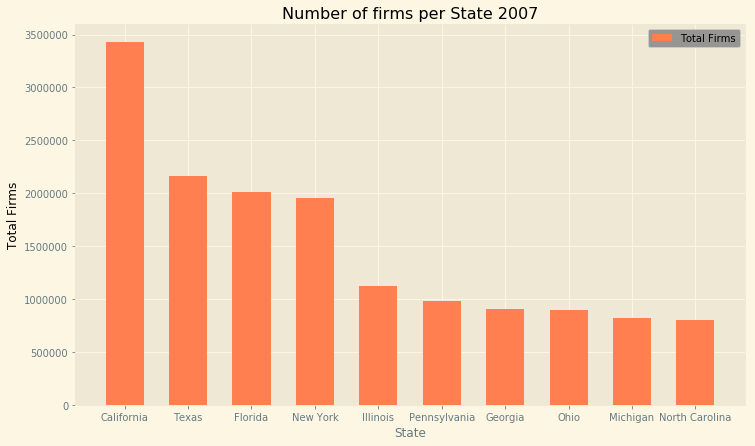

In [29]:
# make all values in the Number of firms Column integers
new_data_2['Number of Firms'] = new_data_2['Number of Firms'].replace({'S': 0})
new_data_2['Number of Firms'] = new_data_2['Number of Firms'].astype(float)
#groupby state and maximum number of firms to extract total firms in each state
state_firms_2 = new_data_2.groupby('State').agg({'Number of Firms':'max'})
#sort values in ascending order to get the 10 highest states
state_firms_2 = state_firms_2.sort_values("Number of Firms", ascending=False)
#select the top 10 states 
state_firms_2 = state_firms_2.head(10)
# reset index of the data frame
state_firms_2.reset_index(inplace=True)
# add all values to a list to plot bar chart
state_firms_2_x = state_firms_2["State"].tolist()
state_firms_2_y = state_firms_2["Number of Firms"].tolist()
#plot the bar chart for the 10 cities
xpos = np.arange(len(state_firms_2_x))
plt.xticks(xpos, state_firms_2_x)
plt.bar(state_firms_2_x, state_firms_2_y, width=0.6,
        label='Total Firms', facecolor='coral', align="center")
legend = plt.legend()
plt.rcParams['figure.figsize']= (12,7)

plt.style.use('Solarize_Light2')
legend.get_frame().set_facecolor('grey')

plt.title('Number of firms per State 2007', color='black')
plt.ylabel('Total Firms', color='black')
plt.xlabel("State")
plt.savefig("Output/Revenue_state2007.png")

In [30]:
merged_firms_number = pd.merge(state_firms, state_firms_2, on="State")
merged_firms_number = merged_firms_number.rename(columns = {"Number of Firms_x":"Number of Firms_2012","Number of Firms_y":"Number of Firms_2007"}) 
merged_firms_number

,State,Number of Firms_2012,Number of Firms_2007
0,California,3548449.0,3425510.0
1,Texas,2356748.0,2164852.0
2,Florida,2100187.0,2009589.0
3,New York,2008988.0,1956733.0
4,Illinois,1135017.0,1123817.0
5,Pennsylvania,975453.0,981501.0
6,Georgia,929864.0,901105.0
7,Ohio,904814.0,897939.0
8,Michigan,834087.0,816972.0
9,North Carolina,805985.0,798791.0


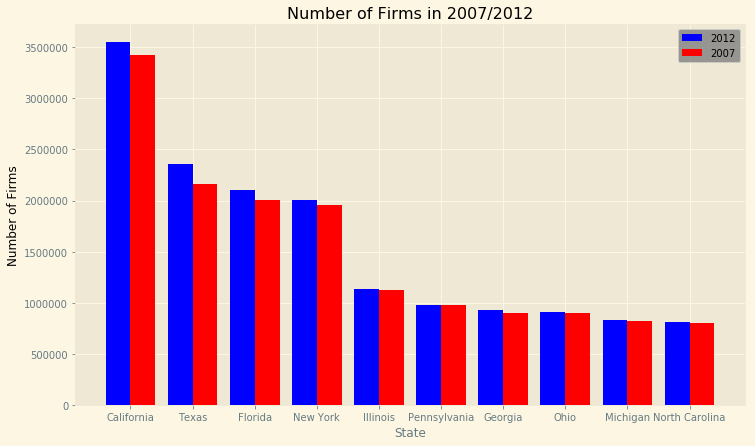

In [38]:
xpos = np.arange(len(merged_firms_number['State']))
plt.xticks(xpos+0.2, merged_firms_number['State'])


plt.bar(xpos, merged_firms_number['Number of Firms_2012'], width=0.4,
        label='2012', facecolor='blue', align='center')
plt.bar(xpos+0.4, merged_firms_number['Number of Firms_2007'], width=0.4,
        label='2007', facecolor='red', align='center')

plt.title('Number of Firms in 2007/2012', color='black')
plt.ylabel('Number of Firms', color='black')

legend = plt.legend()
plt.rcParams['figure.figsize']= (12,7)
plt.style.use('Solarize_Light2')
legend.get_frame().set_facecolor('grey')
plt.xlabel("State")

plt.savefig("Output/total_firms_2012_2007.png")